In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Creating DataFrame df from CSV StandDF
df = pd.read_csv('ReadyDF3', index_col=0)

# Displaying first five results 
df.head()

,Y1,Y2,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,0,1,2.086360,1.0,0.029074,1.710498,1,1.351792,1.306758,0.640426,0.979579,-1.242030,0.172652,-2.012693,-1.937864
1,1,0,2.413300,0.0,-0.013352,1.413903,0,2.487306,0.000000,0.644753,1.275036,-1.031661,0.180631,-1.697064,-1.706131
2,1,0,1.954243,1.0,0.020715,0.867939,0,1.214656,0.000000,0.636816,0.630234,-1.568996,0.171718,-2.562365,-2.302728
3,1,1,2.320146,1.0,0.020023,0.930745,0,1.193831,0.000000,0.539634,0.792909,-1.374161,0.187962,-2.310027,-2.039486
4,0,1,1.903090,1.0,-0.034895,2.800922,1,1.315407,1.195813,0.587413,1.045809,-1.223546,0.177173,-1.907693,-1.858162


In [3]:
## Separate target variables from Data Frame 
## Using .ravel() to create a contiguous flattened array to change the shape of (n_samples)

####ERROR for.len()---vector y was passed when a 1d array was expected. 
####Please change the shape of y to (n_samples, ), for example using ravel().
  ##y = column_or_1d(y, warn=True)
    
y1 =df.loc[:, ['Y1']].values.ravel()
y2 =df.loc[:, ['Y2']].values.ravel()

## Drop target variables from Data Frame 
df = df.drop(['Y1','Y2'], axis=1)

## Drop C6' from DF1 
df1 = df.drop(["C6'"], axis=1)

In [4]:
# Recursive Feature Elimination for Y1 target 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(df1, y1)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True False False False  True False]
[ 5  4  1  9  6  7  1  8  2  3  1 10]


In [5]:
# Recursive Feature Elimination for Y2 target 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(df, y2)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True False False False False  True
 False]
[ 8  4  1 10 11  5  1  6  3  7  9  1  2]


In [6]:

# Checking how many features this dataset have

print(df.shape[1])

13


In [7]:
for i in range(1, df.shape[1]+1):
    print(i)
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes; Target Variable Y1
    rfe = RFE(model, i)
    rfe = rfe.fit(df1, y1)
    # summarize the selection of the attributes
    print('Model with the best', i, 'features')
    print(rfe.support_)
    print(rfe.ranking_)

1
Model with the best 1 features
[False False False False False False  True False False False False False]
[ 7  6  2 11  8  9  1 10  4  5  3 12]
2
Model with the best 2 features
[False False  True False False False  True False False False False False]
[ 6  5  1 10  7  8  1  9  3  4  2 11]
3
Model with the best 3 features
[False False  True False False False  True False False False  True False]
[ 5  4  1  9  6  7  1  8  2  3  1 10]
4
Model with the best 4 features
[False False  True False False False  True False  True False  True False]
[4 3 1 8 5 6 1 7 1 2 1 9]
5
Model with the best 5 features
[False False  True False False False  True False  True  True  True False]
[3 2 1 7 4 5 1 6 1 1 1 8]
6
Model with the best 6 features
[False  True  True False False False  True False  True  True  True False]
[2 1 1 6 3 4 1 5 1 1 1 7]
7
Model with the best 7 features
[ True  True  True False False False  True False  True  True  True False]
[1 1 1 5 2 3 1 4 1 1 1 6]
8
Model with the best 8 features


In [8]:
for i in range(1, df.shape[1]+1):
    print(i)
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes; Target Variable Y2
    rfe = RFE(model, i)
    rfe = rfe.fit(df, y2)
    # summarize the selection of the attributes
    print('Model with the best', i, 'features')
    print(rfe.support_)
    print(rfe.ranking_)

1
Model with the best 1 features
[False False False False False False  True False False False False False
 False]
[10  6  2 12 13  7  1  8  5  9 11  3  4]
2
Model with the best 2 features
[False False  True False False False  True False False False False False
 False]
[ 9  5  1 11 12  6  1  7  4  8 10  2  3]
3
Model with the best 3 features
[False False  True False False False  True False False False False  True
 False]
[ 8  4  1 10 11  5  1  6  3  7  9  1  2]
4
Model with the best 4 features
[False False  True False False False  True False False False False  True
  True]
[ 7  3  1  9 10  4  1  5  2  6  8  1  1]
5
Model with the best 5 features
[False False  True False False False  True False  True False False  True
  True]
[6 2 1 8 9 3 1 4 1 5 7 1 1]
6
Model with the best 6 features
[False  True  True False False False  True False  True False False  True
  True]
[5 1 1 7 8 2 1 3 1 4 6 1 1]
7
Model with the best 7 features
[False  True  True False False  True  True False  True False Fa

In [9]:
###extra trees classifier to report feature importance, 
###and use an abitrary 0.5 value to filter the features
#The idea is whatever features passing the threshold would be selected

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data; Target Variable Y1

model = ExtraTreesClassifier()
model.fit(df1, y1)
# display the relative importance of each attribute
print(model.feature_importances_ > .5)


[False False False False False False False False False False False False]


In [10]:
###extra trees classifier to report feature importance, 
###and use an abitrary 0.5 value to filter the features
#The idea is whatever features passing the threshold would be selected

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data; Target Variable 

model = ExtraTreesClassifier()
model.fit(df, y2)
# display the relative importance of each attribute
print(model.feature_importances_ > .5)

[False False False False False False False False False False False False
 False]


Feature ranking:
1. feature 3 (0.117161)
2. feature 6 (0.100909)
3. feature 7 (0.099516)
4. feature 10 (0.096359)
5. feature 0 (0.094856)
6. feature 11 (0.092215)
7. feature 5 (0.091676)
8. feature 2 (0.089557)
9. feature 9 (0.087607)
10. feature 8 (0.084656)
11. feature 4 (0.023780)
12. feature 1 (0.021709)


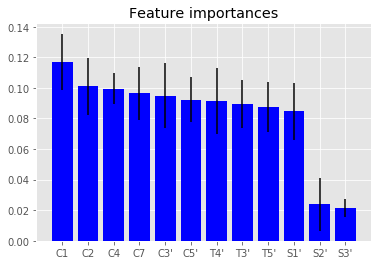

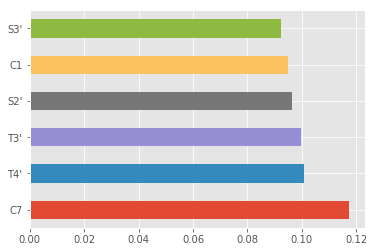

In [11]:
# Build a forest and compute the feature importances
model = ExtraTreesClassifier()
model.fit(df1, y1)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1 , indices[f], importances[indices[f]]))
    

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df1.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(df1.shape[1]), df1.columns)
plt.xlim([-1, df1.shape[1]])
plt.show()


feat_importances = pd.Series(model.feature_importances_, index=df1.columns)
feat_importances.nlargest(6).plot(kind='barh')

#The blue bars are the feature 
##importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 2 (0.104855)
2. feature 5 (0.101283)
3. feature 7 (0.092599)
4. feature 12 (0.087356)
5. feature 8 (0.086900)
6. feature 0 (0.084072)
7. feature 10 (0.081450)
8. feature 6 (0.080105)
9. feature 9 (0.079888)
10. feature 3 (0.077258)
11. feature 11 (0.074009)
12. feature 4 (0.038715)
13. feature 1 (0.011509)


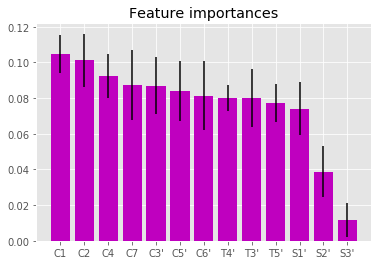

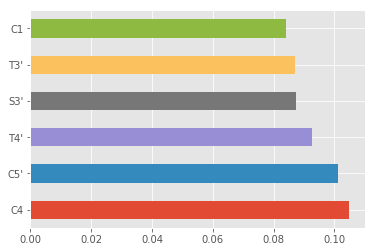

In [12]:
# Build a forest and compute the feature importances
model = ExtraTreesClassifier()
model.fit(df, y2)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df.shape[1]), importances[indices],
       color="m", yerr=std[indices], align="center")
plt.xticks(range(df.shape[1]), df.columns)
plt.xlim([-1, df.shape[1]])
plt.show()


feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(6).plot(kind='barh')

#The red bars are the feature 
##importances of the forest, along with their inter-trees variability.